## 1. Casino Dice Roll Example


How do casinos earn money? The answer is simple - the longer you play, the bigger the chance of you losing money.

Let's assume an imaginary dice roll game between a casino house and a player. The rules are simple.

---
Dice Roll Game Rules

- There is an imaginary dice that rolls between 1 to 100.
- If a player rolls between 1 to 51, the house wins.
- If a player rolls between 52 to 100, the player wins.
- A player can bet as many times as he wants.

With the above rules, the house has 2% higher chance of winning over a player. As a financial analyst of the house, upper management wants you to create a Dice Roll game profit forecast model.

*Question*: If a certain game is configured so that the house has 2% higher chance of winning over a player, what is the expected profit forecast model for the game?

Monte-Carlo simulation can be used to simulate the possible outcomes of dice roll game, and generate a forecast model.

### Import to Libraries

In [1]:
import random
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib notebook

### 1.0 Dice Roll Simulation

In [2]:
def rolldice():
    dice = random.randint(1,100)
    if dice <= 51:                     # Player loses
        return False
    elif dice > 51 & dice <= 100:      # Player wins
        return True

### 1.1 Single Game Simulation

In [3]:
def play(total_funds, wager_amount, total_plays, final_fund):

    play_num = []       # x-axis of the plot
    funds = []          # y-axis of the plot

    play = 1
    while play <= total_plays:
        
        if rolldice():                                # Player wins
            total_funds = total_funds + wager_amount  # updates current total funds
            play_num.append(play)
            funds.append(total_funds)

        else:                                         # Player loses
            total_funds = total_funds - wager_amount 
            play_num.append(play)
            funds.append(total_funds)
            
        play = play + 1

    final_fund.append(funds[-1])                      # final_fund contains the ending fund of all players
    
    return final_fund, play_num, funds

### Results Visualization

In [4]:
def simulate_visualize(init_money, bet, num_bet, num_players=1):      # simulates and generates a plot
    f, ax = plt.subplots()
    count = 1
    ending_fund_all_players = []
    while count <= num_players:
        ending_fund_all_players, num_play, funds_record = play(init_money, bet, num_bet, ending_fund_all_players)
        ax.plot(num_play,funds_record)
        count += 1

    ax.set_title(str(num_players) + ' Player(s): ' + 'Change in Total Fund with Each Game')
    ax.set_ylabel('Player\'s Fund ($)')
    ax.set_xlabel('Number of Bets')
    
    return ending_fund_all_players

In [5]:
def simulate(init_money, bet, num_bet, num_players=1):                # simulates, but does not plot
    count = 1
    ending_fund_all_players = []
    while count <= num_players:
        ending_fund_all_players, num_play, funds_record = play(init_money, bet, num_bet, ending_fund_all_players)
        count += 1
    
    return ending_fund_all_players

## 1.1 Monte-Carlo Simulation: 1 Player


Let's say than an imaginary player, 'Eric', visits the house and wants to play the Dice Roll Game. A Monte-Carlo simulation can be run to simulate the result of Eric's game.

* The simulation will be run with the following conditions:

* Eric starts with \$10,000
* Eric bets \$100 each time
* Eric plays the game 1,000 times

<IPython.core.display.Javascript object>


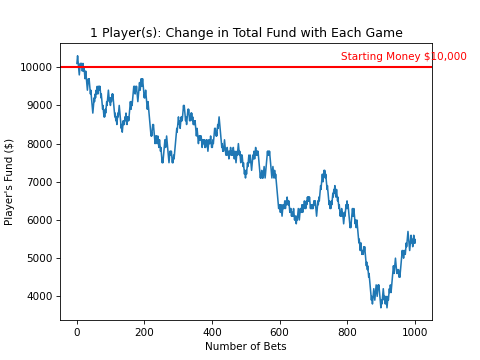

In [6]:
simulate_visualize(init_money=10000, bet=100, num_bet=1000, num_players=1)
plt.axhline(10000, color="red", linewidth=2)
plt.text(780, 10200, 'Starting Money $10,000', color='red');

Eric started with 10,000 dollars. To your surprise, Eric actually ended up earning money from the house by 2,500 dollars after 1,000 games. According to the configuration of the game, the house has 2% higher chance of winning over Eric. Therefore, with such a high number of games, like a thousand, the house was supposed to earn money from the player. But it was not the case here.

Was the configuration of the game wrong, or was Eric just really lucky?

## 1.1 Monte-Carlo Simulation: 100 Players 

Eric earned $2,500 dollars after running 1,000 games. However, if hundred other players play the Dice Roll game for thousand times each, would the result be different? From the house's perspective, what is the expected profit from the Dice Roll game?

To get more accurate estimation of the expected profit, multiple Monte-Carlo simulation will be run. In this case, hundred.

The simulation will be run with the following conditions:

* Hundred players each start with \$10,000
* Hundred players bet \$100 each time
* Hundred players play the game 1,000 times

<IPython.core.display.Javascript object>


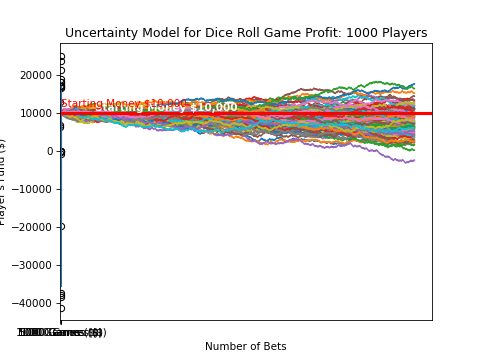

In [7]:
simulate_visualize(init_money=10000, bet=100, num_bet=1000, num_players=100)
plt.axhline(10000, color="white", linewidth=2)
plt.text(100, 10400, 'Starting Money $10,000', color='white', weight='bold');

As it can be shown on the plots, Eric's earning 2,500 dollars after 1,000 games was a plausible outcome. There was even a player who eanred ended up with 16,500 dollars, which means that he earned 6,500 dollars! However, this does not mean that the house will earn negative profit. The plot clearly indicates overall trend in the house earning money over the players as the number of bets increases.

## 1.3 Uncertainty Modeling

The previous simulation results represent the outcome of 100 players each playing 1,000 games. One hundred Monte-Carlo simulations were run, and now we have one hundred samples of 1,000 game simulations data.

To obtain more accurate uncertainty model for the Dice Roll game, further simulations will be run for 1,000 players each playing 100, 1,000, 10,000, and 100,000 games.

In [8]:
df = pd.DataFrame()
for num_games in [100, 1000, 5000, 10000]:
    result = simulate(init_money=10000, bet=100, num_bet=num_games, num_players=1000)
    col_name = str(num_games) + ' Games ($)'
    df[col_name] = result

In [9]:
df.index.name = 'Player Number'
df.head(10)

,100 Games ($),1000 Games ($),5000 Games ($),10000 Games ($)
Player Number,,,,
0,8800,7400,-8000,-16000
1,9200,16200,-2000,2000
2,10400,11400,3200,-18800
3,8600,12800,-1000,-19000
4,9400,4600,1200,-26800
5,9800,7800,5000,6400
6,10200,10400,-2200,-4600
7,8800,7800,-600,-6200
8,10400,3000,2800,-12200


In [10]:
ax = df.boxplot(grid=False)
ax.set_title('Uncertainty Model for Dice Roll Game Profit: 1000 Players')
ax.set_ylabel('Player\'s Fund ($)')
ax.axhline(10000, color="red", linewidth=3);
ax.text(3.5, 11500, 'Starting Money $10,000', color='red');

**Summary:**

A player starts with 10,000 dollars and bets 100 dollar for each game.

- If a player plays 100 games, he will most likely end up between 12,500 to 6800 dollars
- If a player plays 1000 games, he will most likely end up between 15,800 to −
360 dollars
- If a player plays 5,000 games, he will most likely end up between 19,200 to −
18,900 dollars
- If a player plays 10,000 games, he will most likely end up between 15,200 to −
36,000 dollars

## 1.4 Outlier Removal and Mean of the Prediction

The uncertainty model generated by Monte-Carlo simulations gives you a range of possible outcome. But what if you want a single value of the outcome?

One simple way to address this question is to just calculate the average of the simulated data.

**Means of simulated data BEFORE outlier removal**

In [11]:
raw_mean = pd.DataFrame(df.describe().T['mean']).T
raw_mean.rename(index={'mean': 'original mean'}, inplace=True)
raw_mean

,100 Games ($),1000 Games ($),5000 Games ($),10000 Games ($)
original mean,9796.2,8225.2,89.8,-10124.6


But as it can be observed in the boxplot, the simulated data contains outliers (circled points). One might want to remove these outliers before calculating the average of the data to improve accuracy. The traditional IQR outlier detection method can be implemented.
$$IQR = Q3 - Q1$$
$$Lower Fence = Q1 - 1.5IQR$$
$$Upper Fence = Q3 + 1.5IQR$$

In [12]:
def get_outlier_params(orig_data):
    iqr_params = orig_data.describe().T[['25%' , '75%']]
    iqr_params['IQR'] = iqr_params['75%'] - iqr_params['25%']
    iqr_params['Lower Fence'] = iqr_params['25%'] - 1.5 * iqr_params['IQR']
    iqr_params['Upper Fence'] = iqr_params['75%'] + 1.5 * iqr_params['IQR']
    return iqr_params

In [13]:
iqr_params = get_outlier_params(df)
iqr_params

,25%,75%,IQR,Lower Fence,Upper Fence
100 Games ($),9000.0,10400.0,1400.0,6900.0,12500.0
1000 Games ($),6200.0,10250.0,4050.0,125.0,16325.0
5000 Games ($),-4600.0,5000.0,9600.0,-19000.0,19400.0
10000 Games ($),-16800.0,-3400.0,13400.0,-36900.0,16700.0


**Means of simulated data AFTER outlier removal**

In [14]:
def remove_outliers(outlier_params, data):
    outlier_removed_df = pd.DataFrame()
    for column in data.columns:
        outlier_removed_df[column] = data[column].apply(lambda x: x if x > outlier_params['Lower Fence'][column] else np.nan)
        outlier_removed_df[column] = data[column].apply(lambda x: x if x < outlier_params['Upper Fence'][column] else np.nan)
    return outlier_removed_df

In [15]:
new_df = remove_outliers(iqr_params, df)
new_mean = pd.DataFrame(new_df.describe().round(1).T['mean']).T
new_mean.rename(index={'mean': 'outlier-removed mean'}, inplace=True)

pd.concat([raw_mean, new_mean])

,100 Games ($),1000 Games ($),5000 Games ($),10000 Games ($)
original mean,9796.2,8225.2,89.8,-10124.6
outlier-removed mean,9793.2,8178.3,89.8,-10281.0
